In [54]:
#import get to call a get request on the site
import requests

#import to manipulate arrays with numpy
import numpy as np

#import to create, clean, and parse data frames with pandas
import pandas as pd

#import to enable datascraping
from bs4 import BeautifulSoup

#import to set up 'sleep' to wait between page loads
import time

import timeit

# import Mongo so our webscraper dumps its scraped data without losing it
from pymongo import MongoClient
import pymongo

#import to make that html readable
import pprint

#import regular expressions operations
import re

#import to get the universe in balance
import random


from dateutil.parser import parse

#import so we can do some heavy stats work
import scipy as sp
from scipy.stats import binom
import scipy.stats as stats

#import to access certain plotting features
import seaborn as sns

#import because we need its program functions
import math

#import because we need to plot and make it pretty
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
plt.style.use('ggplot')

In [69]:
def motorcycle_post_parser(total_listings):
    client = MongoClient('localhost', 27017)
    db = client['craigslist_motorcycles']
    post_html = db['motorcycle_posts'].find()[0:total_listings]
    
    title = []
    year = []
    price = []
    neighborhood = []
    description = []
    url = []
    #attributes
    model = []
    vin = []
    condition = []
    cryptocurrency = []
    delivery = []
    engine_size = []
    fuel_type = []
    mileage = []
    paint_color = []
    street_legal = []
    title_status = []
    transmission = []
    bike_type = []

    iterations = 0

    for _ in post_html:         
        
        # attributes key words to parse through attributes
        vin_ = 'VIN:'
        condition_ = 'condition:'
        cryptocurrency_ = 'cryptocurrency'
        delivery_ = 'delivery'
        engine_size_ = 'engine displacement'
        fuel_type_ = 'fuel:'
        mileage_ = 'odometer:'
        paint_color_ = 'paint color:'
        street_legal_ = 'street legal'
        title_status_ = 'title status:'
        transmission_ = 'transmission:'
        bike_type_ = 'type:'  
        
        response = _['html']
        soup = BeautifulSoup(response, 'html.parser')

        try:
            post_title = soup.find('span', id = 'titletextonly')
            title.append(post_title.text)
        except:
            title.append(np.nan)
            
        try:
            year.append((parse(post_title, fuzzy=True).year))
        except:
            year.append(np.nan)
        
        try:
            post_price = soup.find('span', class_ = 'price').text
            price.append(float(post_price.lstrip('$')))
        except:
            price.append(np.nan)
        
        try:
            post_neighborhood = soup.find('small')
            neighborhood.append(((post_neighborhood.text).replace(' (', '')).replace(')', ''))
        except:
            neighborhood.append(np.nan)
        
        try:
            post_description = soup.find('section', id = 'postingbody')
            description.append((post_description.text).replace('\n\nQR Code Link to This Post\n\n\n', ''))
        except:
            description.append(np.nan)
        
        url.append(_['_id'])
        
        post_attributes = str(soup.find_all('p', attrs = {'class': 'attrgroup'}))
        post_attributes = post_attributes.replace(post_attributes, str(post_attributes.replace('''[<p class="attrgroup">\n<span><b>''', '').replace('''</b></span>\n<br/>\n</p>, ''','').replace('''<p class="attrgroup">\n<span>''', ',').replace(''' <b>''', '').replace('''</b></span>\n<br/>\n<span>''', ',').replace('''</span>\n<br/>\n<span>''', ',').replace('''</b></span>\n<br/>\n</p>]''', '').replace('''<p class="attrgroup">\n<span class="otherpostings">\n<a href="//auburn.craigslist.org/search/sss?userid=193613506">\nmore ads  by this user        </a>\n</span>\n</p>]''', '')))
                    
        bike_attributes = (post_attributes.split(','))

        vin_res = [i for i in bike_attributes if vin_ in i]
        condition_res = [i for i in bike_attributes if condition_ in i]
        cryptocurrency_res = [i for i in bike_attributes if cryptocurrency_ in i]
        delivery_res = [i for i in bike_attributes if delivery_ in i]
        engine_size_res = [i for i in bike_attributes if engine_size_ in i]
        fuel_type_res = [i for i in bike_attributes if fuel_type_ in i]
        mileage_res = [i for i in bike_attributes if mileage_ in i]
        paint_color_res = [i for i in bike_attributes if paint_color_ in i]
        street_legal_res = [i for i in bike_attributes if street_legal_ in i]
        title_status_res = [i for i in bike_attributes if title_status_ in i]
        transmission_res = [i for i in bike_attributes if transmission_ in i]
        bike_type_res = [i for i in bike_attributes if bike_type_ in i]

        try:
            model.append(bike_attributes[0])
        except:
            model.append('')
                
        try:
            vin.append(str(vin_res[0]).replace('VIN:', ''))
        except:
            vin.append('')
            
        try:
            condition.append(str(condition_res[0]).replace('condition:', ''))
        except:
            condition.append('')
               
        try:
            cryptocurrency.append((cryptocurrency_res[0]))
        except:
            cryptocurrency.append('')
        
        try:
            delivery.append(delivery_res[0])
        except:
            delivery.append('')
                
        try:
            engine_size.append(float(str(engine_size_res[0]).replace('engine displacement (CC):', '')))
        except:
            engine_size.append(np.nan)
            
        try:
            fuel_type.append(str(fuel_type_res[0]).replace('fuel:', ''))
        except:
            fuel_type.append('')
            
        try:
            mileage.append(float(str(mileage_res[0]).replace('odometer:', '')))
        except:
            mileage.append(np.nan)
                    
        try:
            paint_color.append(str(paint_color_res[0]).replace('paint color:', ''))
        except:
            paint_color.append('')
                 
        try:
            street_legal.append(street_legal_res[0])
        except:
            street_legal.append('')
    
        try:
            title_status.append(str(title_status_res[0]).replace('title status:', ''))
        except:
            title_status.append('')
                
        try:
            transmission.append(str(transmission_res[0]).replace('transmission:', ''))
        except:
            transmission.append('')
            
        try:
            bike_type.append(str(bike_type_res[0]).replace('type:', ''))
        except:
            bike_type.append('')
                
        iterations += 1

        if iterations%1000 == 0:
            print(str(iterations/total_listings) + ' parsed succesfully')
    
    df_dictionary = { 'title': title, 'year': year, 'price': price, 'neighborhood': neighborhood, 'description': description, 'url':url, 'model':model, 'vin': vin, 'condition': condition, 'cryptocurrency': cryptocurrency, 'delivery': delivery, 'engine_size': engine_size, 'fuel_type': fuel_type, 'mileage': mileage, 'color': paint_color, 'street legal': street_legal, 'title status': title_status, 'transmission': transmission, 'bike type': bike_type}
    df = pd.DataFrame(df_dictionary)
    df['neighborhood'].replace('\n       google map\n        ', '', inplace=True)
#     df.replace('', np.nan, inplace=True)
    return df

In [73]:
df = motorcycle_post_parser(10000)


0.1 parsed succesfully
0.2 parsed succesfully
0.3 parsed succesfully
0.4 parsed succesfully
0.5 parsed succesfully
0.6 parsed succesfully
0.7 parsed succesfully
0.8 parsed succesfully
0.9 parsed succesfully
1.0 parsed succesfully


/home/eric/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname V identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [74]:
df.head()

,title,year,price,neighborhood,description,url,model,vin,condition,cryptocurrency,delivery,engine_size,fuel_type,mileage,color,street legal,title status,transmission,bike type
0,2016 Honda CBR300r,2016.0,2900.0,Auburn,"2016 Honda CBR300r\n6,186 miles as of listing\...",https://auburn.craigslist.org/mcy/d/auburn-uni...,2016 honda cbr300r,,excellent,,,286.0,gas,NaN,yellow,street legal,clean,manual,sport bike
1,"BAD CREDIT, NO CREDIT, OK! WE WORK WITH EVERYONE!",NaN,NaN,FAYETTEVILLE,"WE SHIP NATIONWIDE, FINANCE NATIONWIDE! YOU SE...",https://auburn.craigslist.org/mcd/d/fayettevil...,all bikes,,excellent,,,NaN,gas,NaN,,,clean,manual,
2,2017 Yamaha FZ 07 very low miles,2017.0,5000.0,Near Montgomery,"2017 Yamaha FZ-07 with only 1100 miles, bike i...",https://auburn.craigslist.org/mcy/d/montgomery...,2017 Yamaha FZ-07,,like new,,,700.0,gas,1100.0,silver,,clean,manual,street
3,2010 Yellow Goldwing GL1800 CSC(see pics/price...,NaN,NaN,,2010 Yellow GL1800 CSC Viper\n\nLOOK!!! only 8...,https://auburn.craigslist.org/mcd/d/haleyville...,2010 Honda GL1800 CSC,,like new,,,1832.0,gas,8209.0,yellow,,clean,manual,"trike<p class=""attrgroup"">\n<span class=""other..."
4,2006 Honda XR650L *Price Drop*,2006.0,3800.0,Auburn,"2006 Honda XR650L \n\n8,000 miles. This number...",https://auburn.craigslist.org/mcy/d/auburn-200...,2006 honda xr650l,,excellent,,,650.0,gas,8100.0,red,street legal,clean,manual,dual-sport


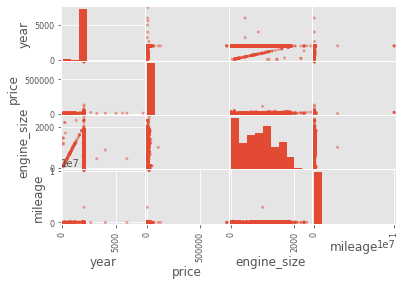

In [75]:
pd.plotting.scatter_matrix(df)
plt.show()

In [25]:
df['neighborhood'][3]

'\n       google map\n        '

In [102]:
description

['\n\nQR Code Link to This Post\n\n\n2016 Honda CBR300r\n6,186 miles as of listing\nafter market: fender eliminator kit and bubble windscreen\nI have the original parts if you would prefer those.\nclean title\n\nThis is an excellent starter bike or daily commuter. 50+ mpg around auburn and the best parking on campus!\n\nNot looking to trade\n\n',
 "\n\nQR Code Link to This Post\n\n\nWE SHIP NATIONWIDE, FINANCE NATIONWIDE! YOU SEE IT! WE SHIP IT! NO PROBLEM!\n\nFINANCING AVAILABLE. WE CAN GET ALMOST EVERYONE ON A MOTORCYCLE. COME SEE OUR EXPERIENCED AND TRUSTED FINANCE TEAM WHO WILL WORK WITH YOU REGARDLESS OF CREDIT TO MAKE YOU HAPPY.\n\nFLIP MY CYCLE ONLINE IS A GREAT PLACE TO START TO LOOK.\n\nSlow pay, bad credit, no credit, divorce, bankruptcy, judgement, past repos and first time buyers.\nHave you been turned down before? We can get you riding. We have many lenders that can help you rebuild your credit. We have many finance options available from zero down to minimal down payments

In [103]:
url

['https://auburn.craigslist.org/mcy/d/auburn-university-2016-honda-cbr300r/7120429265.html',
 'https://auburn.craigslist.org/mcd/d/fayetteville-bad-credit-no-credit-ok-we/7119776172.html',
 'https://auburn.craigslist.org/mcy/d/montgomery-2017-yamaha-fz-07-very-low/7118845773.html',
 'https://auburn.craigslist.org/mcd/d/haleyville-2010-yellow-goldwing-gl1800/7116263343.html',
 'https://auburn.craigslist.org/mcy/d/auburn-2006-honda-xr650l-price-drop/7114333691.html',
 'https://auburn.craigslist.org/mcy/d/auburn-2016-harley-davidson-roadster/7114312352.html',
 'https://auburn.craigslist.org/mcy/d/opelika-2017-concours-1400/7111191074.html',
 'https://bham.craigslist.org/mcy/d/tuscaloosa-2008-harley-davidson/7122367787.html',
 'https://bham.craigslist.org/mcy/d/springville-2007-yamaha-star-1300/7122326387.html',
 'https://bham.craigslist.org/mcy/d/birmingham-1993-honda-goldwing-gl1500/7122190883.html',
 'https://bham.craigslist.org/mcy/d/childersburg-ktm-50-sx-pro-senior-lc/7121832377.html

In [104]:
model

['2016 honda cbr300r',
 ' all bikes',
 '2017 Yamaha FZ-07',
 '2010 Honda GL1800 CSC',
 '2006 honda xr650l',
 '2016 harley-davidson roadster',
 '2017 2017 kawasaki concours 1400zg',
 '2008 harley davidson heritage classic',
 '2007 yamaha v star 1300',
 '1993 Handa Goldwing',
 '2003 ktm 50 sx',
 '2017 2017 Kawasaki Vulcan Vaquero abs',
 '2011 yamaha fz6r',
 '2013 Harley Davidson Street Glide',
 ' harley davidson',
 '2009 kawasaki',
 '1965 Harley Davidson Electra Glide',
 '2010 harley davidson ultra classic',
 '2010 harley davidson ultra classic',
 '2006 2006 ninja ZX14',
 '2010 kawasaki zx6r',
 '2014 Harley Tri Glide',
 '2014 Harley Tri Glide',
 '2014 BMK K1600 GTL',
 '2017 Suzuki GSX-R750',
 '2008 harley davidson',
 '2019 indian scout',
 ' ducati multistrada',
 '2006 harley davidson',
 '2015 2015 Honda PCX 150 cc',
 '2015 Harley Davidson XG500',
 ' Harley-Davidson',
 '1983 honda goldwing interstate',
 ' harley davidson fdfx',
 '2009 suzuki vstrom 650',
 '2003 O3 Harley',
 '2002 harley d

In [105]:
vin

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '1HFSC2205PA501856',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '1HD1MAL16EB851071',
 '1HD1MAL16EB851071',
 'WB1061203EZZ25082',
 'JS1GR7MA6H2101909',
 '',
 '56KMSA008K3140133',
 '',
 '',
 'RLHKF1803FY000831',
 '1HD4NAA18FC503670',
 '',
 '1HFSC0218DA326320',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '1HD1BWV14DB042926',
 '1HD1BWV14DB042926',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '1HD1YVK16KC017756',
 '1HD1YVK16KC017756',
 '',
 '',
 'JYAVP33E5BA003141',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '1HD1BWV14CB041418',
 '1HD1KGL18GB672512',
 '1HD1KGL18GB672512',
 '',
 '',
 '',
 '1HD1YMJ17LB015582',
 '1HD1YMJ17LB015582',
 '',
 '1HD1KBM16BB664693',
 'JYAVN05EXEA000158',
 '',
 '',
 '',
 '',
 '3NSRAB929LG820015',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 

In [106]:
condition

['excellent',
 'excellent',
 'like new',
 'like new',
 'excellent',
 'excellent',
 'like new',
 'good',
 'like new',
 'good',
 'excellent',
 'like new',
 'excellent',
 'excellent',
 'excellent',
 'like new',
 'excellent',
 'like new',
 'like new',
 '',
 'like new',
 'good',
 'good',
 'like new',
 '',
 'excellent',
 'excellent',
 '',
 'like new',
 'like new',
 'like new',
 '',
 'good',
 '',
 'good',
 'good',
 'excellent',
 'like new',
 'excellent',
 '',
 'like new',
 'like new',
 'excellent',
 'excellent',
 'excellent',
 'excellent',
 '',
 'excellent',
 'good',
 'good',
 '',
 'excellent',
 '',
 'excellent',
 'excellent',
 '',
 '',
 '',
 '',
 '',
 'like new',
 'like new',
 'excellent',
 'like new',
 '',
 'good',
 'excellent',
 'excellent',
 'excellent',
 'new',
 'excellent',
 'like new',
 'excellent',
 '',
 'like new',
 'like new',
 'excellent',
 '',
 'new',
 'new',
 'new',
 '',
 'excellent',
 'excellent',
 'good',
 'like new',
 'new',
 'excellent',
 'like new',
 '',
 'excellent',
 'like

In [107]:
cryptocurrency

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',


In [108]:
delivery

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'delivery available',
 '',
 '',
 '',
 '',
 '',
 '',
 'delivery available',
 '',
 '',
 '',
 '',
 'delivery available',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'delivery available',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'delivery available',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'delivery available',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'delivery available',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'delivery available',
 '',
 

In [109]:
engine_size

[286.0,
 nan,
 700.0,
 1832.0,
 650.0,
 1202.0,
 nan,
 96.0,
 1300.0,
 1500.0,
 50.0,
 nan,
 600.0,
 103.0,
 nan,
 nan,
 nan,
 96.0,
 96.0,
 nan,
 nan,
 1690.0,
 1690.0,
 1600.0,
 nan,
 nan,
 1133.0,
 nan,
 nan,
 150.0,
 500.0,
 nan,
 1100.0,
 nan,
 650.0,
 1450.0,
 1450.0,
 1832.0,
 1832.0,
 1690.0,
 nan,
 nan,
 nan,
 650.0,
 103.0,
 nan,
 nan,
 103.0,
 1690.0,
 1690.0,
 nan,
 nan,
 nan,
 1340.0,
 1340.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 1868.0,
 1868.0,
 nan,
 1800.0,
 2.0,
 1300.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 450.0,
 nan,
 nan,
 nan,
 103.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 500.0,
 1776.0,
 1200.0,
 1200.0,
 nan,
 1520.0,
 800.0,
 nan,
 1569.0,
 1690.0,
 1690.0,
 nan,
 nan,
 1690.0,
 1753.0,
 1753.0,
 nan,
 0.0,
 0.0,
 nan,
 nan,
 250.0,
 1800.0,
 nan,
 nan,
 nan,
 nan,
 1783.0,
 1833.0,
 117.0,
 nan,
 1200.0,
 1200.0,
 750.0,
 nan,
 1585.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 96.0,
 nan,
 1000.0,
 nan,
 nan,
 1300.0,
 1300.0,
 nan,
 nan,
 650.0,
 nan,
 nan,
 107.0,
 nan,
 nan,
 150

In [110]:
fuel_type

['gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'electric',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'g

In [111]:
mileage

[nan,
 nan,
 1100.0,
 8209.0,
 8100.0,
 6200.0,
 nan,
 28800.0,
 4100.0,
 101000.0,
 nan,
 nan,
 4695.0,
 19835.0,
 nan,
 nan,
 nan,
 38800.0,
 38800.0,
 24900.0,
 9050.0,
 44274.0,
 44274.0,
 22000.0,
 2625.0,
 nan,
 1090.0,
 nan,
 nan,
 782.0,
 12128.0,
 nan,
 78002.0,
 4500.0,
 44235.0,
 17000.0,
 33000.0,
 nan,
 20700.0,
 51339.0,
 nan,
 8608.0,
 13900.0,
 7002.0,
 30900.0,
 nan,
 nan,
 7000.0,
 10715.0,
 10715.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 458.0,
 458.0,
 31000.0,
 5400.0,
 13085.0,
 24075.0,
 nan,
 44124.0,
 1900.0,
 nan,
 nan,
 2057.0,
 nan,
 nan,
 457.0,
 3400.0,
 9000.0,
 5400.0,
 0.0,
 1.0,
 nan,
 nan,
 15535.0,
 nan,
 nan,
 800.0,
 nan,
 22238.0,
 1117.0,
 nan,
 14000.0,
 6458.0,
 6458.0,
 nan,
 nan,
 6838.0,
 221.0,
 221.0,
 nan,
 22265.0,
 5664.0,
 nan,
 nan,
 22224.0,
 40400.0,
 1.0,
 nan,
 2248.0,
 nan,
 22500.0,
 1.0,
 15000.0,
 15000.0,
 nan,
 4800.0,
 nan,
 nan,
 4800.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 5753.0,
 nan,
 nan,
 3600.0,
 930

In [112]:
paint_color

['yellow',
 '',
 'silver',
 'yellow',
 'red',
 'red',
 'blue',
 'red',
 'red',
 'black',
 'silver',
 '',
 'red',
 'red',
 'blue',
 'blue',
 'black',
 'red',
 'red',
 '',
 'black',
 'black',
 'black',
 'grey',
 '',
 'black',
 'blue',
 '',
 'red',
 'white',
 'black',
 '',
 'red',
 '',
 'custom',
 'silver',
 'green',
 'grey',
 'grey',
 '',
 'blue',
 'black',
 'blue',
 '',
 'white',
 'custom',
 '',
 'black',
 'black',
 'black',
 '',
 '',
 '',
 'black',
 'black',
 '',
 '',
 '',
 '',
 '',
 'black',
 'black',
 'blue',
 'custom',
 'black',
 'orange',
 'red',
 'blue',
 '',
 '',
 'red',
 'blue',
 'white',
 '',
 'custom',
 'blue',
 'black',
 '',
 '',
 '',
 '',
 '',
 'red',
 'custom',
 'black',
 'black',
 'white',
 'black',
 'grey',
 '',
 'black',
 'silver',
 'silver',
 'black',
 'white',
 'black',
 'custom',
 'custom',
 '',
 'green',
 'black',
 '',
 '',
 'silver',
 'red',
 'white',
 '',
 'black',
 '',
 'purple',
 'white',
 'custom',
 'red',
 '',
 'green',
 'black',
 '',
 'custom',
 '',
 '',
 '',


In [113]:
street_legal

['street legal',
 '',
 '',
 '',
 'street legal',
 'street legal',
 'street legal',
 'street legal',
 '',
 'street legal',
 '',
 '',
 'street legal',
 'street legal',
 '',
 '',
 '',
 'street legal',
 'street legal',
 'street legal',
 '',
 '',
 '',
 'street legal',
 '',
 '',
 'street legal',
 '',
 '',
 'street legal',
 '',
 '',
 'street legal',
 '',
 'street legal',
 'street legal',
 'street legal',
 '',
 '',
 'street legal',
 '',
 'street legal',
 'street legal',
 '',
 '',
 '',
 '',
 'street legal',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'street legal',
 '',
 '',
 'street legal',
 '',
 'street legal',
 '',
 '',
 '',
 '',
 '',
 'street legal',
 '',
 '',
 '',
 '',
 '',
 '',
 'street legal',
 '',
 '',
 '',
 'street legal',
 '',
 '',
 'street legal',
 '',
 '',
 'street legal',
 '',
 'street legal',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'street legal',
 'street legal',
 '',
 '',
 '',
 '',
 'street legal',
 '',
 'street legal',
 'street legal',
 ''

In [114]:
title_status

['clean',
 'clean',
 'clean',
 'clean',
 'clean',
 'clean',
 'lien',
 'clean',
 'clean',
 'clean',
 '',
 'clean',
 'clean',
 'clean',
 'clean',
 'clean',
 '',
 'clean',
 'clean',
 '',
 'clean',
 'clean',
 'clean',
 'clean',
 'clean',
 'clean',
 'clean',
 '',
 'clean',
 '',
 'clean',
 '',
 'clean',
 '',
 'clean',
 'clean',
 'clean',
 'clean',
 'clean',
 'clean',
 'clean',
 'clean',
 'clean',
 '',
 'clean',
 'clean',
 '',
 'clean',
 'clean',
 'clean',
 '',
 'clean',
 '',
 'clean',
 'clean',
 'clean',
 'clean',
 'clean',
 'clean',
 '',
 'clean',
 'clean',
 'clean',
 'clean',
 'clean',
 'clean',
 'clean',
 'rebuilt',
 '',
 'clean',
 'clean',
 'clean',
 'clean',
 '',
 'clean',
 'clean',
 'clean',
 '',
 'clean',
 'clean',
 'clean',
 '',
 'clean',
 'clean',
 'clean',
 'clean',
 'clean',
 'clean',
 'clean',
 'clean',
 'clean',
 'clean',
 'clean',
 'clean',
 'clean',
 'clean',
 'clean',
 'clean',
 '',
 'clean',
 'clean',
 '',
 '',
 'clean',
 'clean',
 'clean',
 '',
 'clean',
 'clean',
 'clean',

In [115]:
transmission

['manual',
 'manual',
 'manual',
 'manual',
 'manual',
 'manual',
 'manual',
 'manual',
 'manual',
 'manual',
 'automatic',
 'manual',
 'manual',
 'manual',
 'manual',
 'manual',
 'manual',
 'manual',
 'manual',
 'manual',
 'manual',
 'manual',
 'manual',
 'manual',
 'other<p class="attrgroup">\n<span class="otherpostings">\n<a href="//bham.craigslist.org/search/sss?userid=339973574">\nmore ads  by this user        </a>\n</span>\n</p>]',
 'manual',
 'manual',
 'manual',
 'manual',
 'automatic',
 'manual<p class="attrgroup">\n<span class="otherpostings">\n<a href="//bham.craigslist.org/search/sss?userid=5479154">\nmore ads  by this user        </a>\n</span>\n</p>]',
 'manual<p class="attrgroup">\n<span class="otherpostings">\n<a href="//bham.craigslist.org/search/sss?userid=269845165">\nmore ads  by this user        </a>\n</span>\n</p>]',
 'manual',
 'manual',
 'manual',
 'manual',
 'manual',
 'manual',
 'manual',
 'manual',
 'manual',
 'manual',
 'manual',
 'manual',
 'manual',
 'manua

In [116]:
bike_type

['sport bike',
 '',
 'street',
 'trike<p class="attrgroup">\n<span class="otherpostings">\n<a href="//auburn.craigslist.org/search/sss?userid=118773920">\nmore ads  by this user        </a>\n</span>\n</p>]',
 'dual-sport',
 '',
 'sport touring',
 'cruiser',
 'touring',
 'touring',
 'dirtbike',
 'touring<p class="attrgroup">\n<span class="otherpostings">\n<a href="//bham.craigslist.org/search/sss?userid=138551021">\nmore ads  by this user        </a>\n</span>\n</p>]',
 'sport touring',
 'touring',
 'touring',
 'trike',
 '',
 'touring',
 'touring',
 '',
 'sport bike',
 'trike<p class="attrgroup">\n<span class="otherpostings">\n<a href="//bham.craigslist.org/search/sss?userid=47732091">\nmore ads  by this user        </a>\n</span>\n</p>]',
 'trike<p class="attrgroup">\n<span class="otherpostings">\n<a href="//huntsville.craigslist.org/search/sss?userid=47732091">\nmore ads  by this user        </a>\n</span>\n</p>]',
 'touring',
 '',
 'touring',
 'cruiser',
 '',
 'touring',
 'scooter',
 ''